In [26]:
# import nessary model
import numpy as np 
import random
import matplotlib.pyplot as plt
import pickle
import cv2
import os

In [27]:
# load file
Directory =r"C:\Users\Logithashwath\Documents\machine learning program.practice\animals"
Category = ['cats','dogs']

In [28]:
# go to image file and get feature from image and all image shape change particularly same shape 
img_size = 100
data = []

for categ in Category:
    folder= os.path.join(Directory,categ)
    label = Category.index(categ)
    for img in os.listdir(folder):
        imgpath=os.path.join(folder,img)
        imgarr = cv2.imread(imgpath)
        imgarr = cv2.resize(imgarr,(img_size,img_size))
        data.append([imgarr,label])
        
        
    
    

In [29]:
# randam shuffle used to all label value mixed with each other ,its going to stop imbalance dataset 
random.shuffle(data)

In [30]:
len(data)

2000

In [31]:
#split feature and labels
X=[]
y=[]
for features,labels in data:
    X.append(features)
    y.append(labels)

In [32]:
# its change to array
X=np.array(X)
y=np.array(y)

In [33]:
#its used for supose i write code in another note book and easily imort the data
pickle.dump(X, open("X.pickle","wb"))
pickle.dump(y, open("y.pickle","wb"))
    

In [34]:
# i scaling the features all value change to 0,1 because easly learn the patter to the model
# all feature values range is 0 to 255  only ,so i divided X into 255, now easly learn model

X=X/255

In [35]:
X

array([[[[0.        , 0.00784314, 0.01176471],
         [0.        , 0.00784314, 0.01176471],
         [0.        , 0.00784314, 0.01176471],
         ...,
         [0.34117647, 0.29411765, 0.28627451],
         [0.34509804, 0.29803922, 0.29019608],
         [0.32941176, 0.29411765, 0.30588235]],

        [[0.        , 0.00784314, 0.01176471],
         [0.        , 0.00784314, 0.01176471],
         [0.        , 0.00784314, 0.01176471],
         ...,
         [0.34117647, 0.29411765, 0.28627451],
         [0.34509804, 0.29803922, 0.29019608],
         [0.3372549 , 0.30588235, 0.30980392]],

        [[0.        , 0.00392157, 0.00784314],
         [0.        , 0.00392157, 0.00784314],
         [0.00392157, 0.01176471, 0.01568627],
         ...,
         [0.34117647, 0.29411765, 0.28627451],
         [0.3372549 , 0.29019608, 0.28235294],
         [0.32941176, 0.30196078, 0.29019608]],

        ...,

        [[0.        , 0.        , 0.01568627],
         [0.13333333, 0.13333333, 0.13333333]

In [36]:
#there is 2000 image , shape is 100*100 and 3 chanels

X.shape

(2000, 100, 100, 3)

In [37]:
#spliting traing and test dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y  ,test_size=0.1,random_state=42)

In [38]:
#its a import model build library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.optimizers import Adam

In [39]:
# model build using cnn

model=Sequential()

model.add(Conv2D(64,(3,3), activation= "relu"))
model.add(MaxPool2D(2,2))          

model.add(Conv2D(64,(3,3), activation="relu"))
model.add(MaxPool2D(2,2))          
          
model.add(Flatten())
model.add(Dense(128,input_shape= X.shape[1:],activation='relu'))


model.add(Dense(2,activation="softmax"))        

In [40]:
#it's for compile and back propagation using optimizer
model.compile(optimizer=Adam(learning_rate=0.001) ,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [44]:
# finall train the model

model.fit(X_train,y_train,epochs=5,batch_size=64, validation_split=0.1)

Epoch 1/5
26/26 [==============================] - 24s 910ms/step - loss: 0.4538 - accuracy: 0.7852 - val_loss: 0.6573 - val_accuracy: 0.6833
Epoch 2/5
26/26 [==============================] - 26s 990ms/step - loss: 0.3432 - accuracy: 0.8512 - val_loss: 0.7459 - val_accuracy: 0.6389
Epoch 3/5
26/26 [==============================] - 24s 917ms/step - loss: 0.2829 - accuracy: 0.8827 - val_loss: 0.8479 - val_accuracy: 0.6833
Epoch 4/5
26/26 [==============================] - 25s 953ms/step - loss: 0.1927 - accuracy: 0.9247 - val_loss: 0.8655 - val_accuracy: 0.6611
Epoch 5/5
26/26 [==============================] - 26s 979ms/step - loss: 0.1115 - accuracy: 0.9642 - val_loss: 1.0125 - val_accuracy: 0.6611


In [45]:
# evaluate the model

model.evaluate(X_test,y_test)

7/7 [==============================] - 1s 106ms/step - loss: 0.9548 - accuracy: 0.6900


[0.9548197388648987, 0.6899999976158142]

# Making Prediction

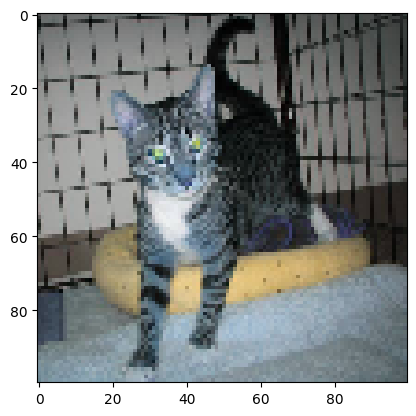

1/1 [==============================] - 0s 62ms/step
[[0.94177663 0.05822336]]
its a  cat


In [93]:
idx2= random.randint(0,len(y_test))
plt.imshow(X_test[idx2,:])
plt.show()     

predict= model.predict(X_test[idx2,:].reshape(1,100,100,3))
print(predict)
predict= predict>0.5
if(predict==0).all():
 pre="dog"
else:
  pre="cat" 
    
print("its a ",pre)